<a href="https://colab.research.google.com/github/ChaitanyaKulkarni001/MachineLearning/blob/main/Multiple_linear_regression_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear **Regression**

Formula

|` y heat = b0 + b1X1+ b2X2 +....bnXn |`


dependant var = y_intercpt(constant)+ slope*coeff

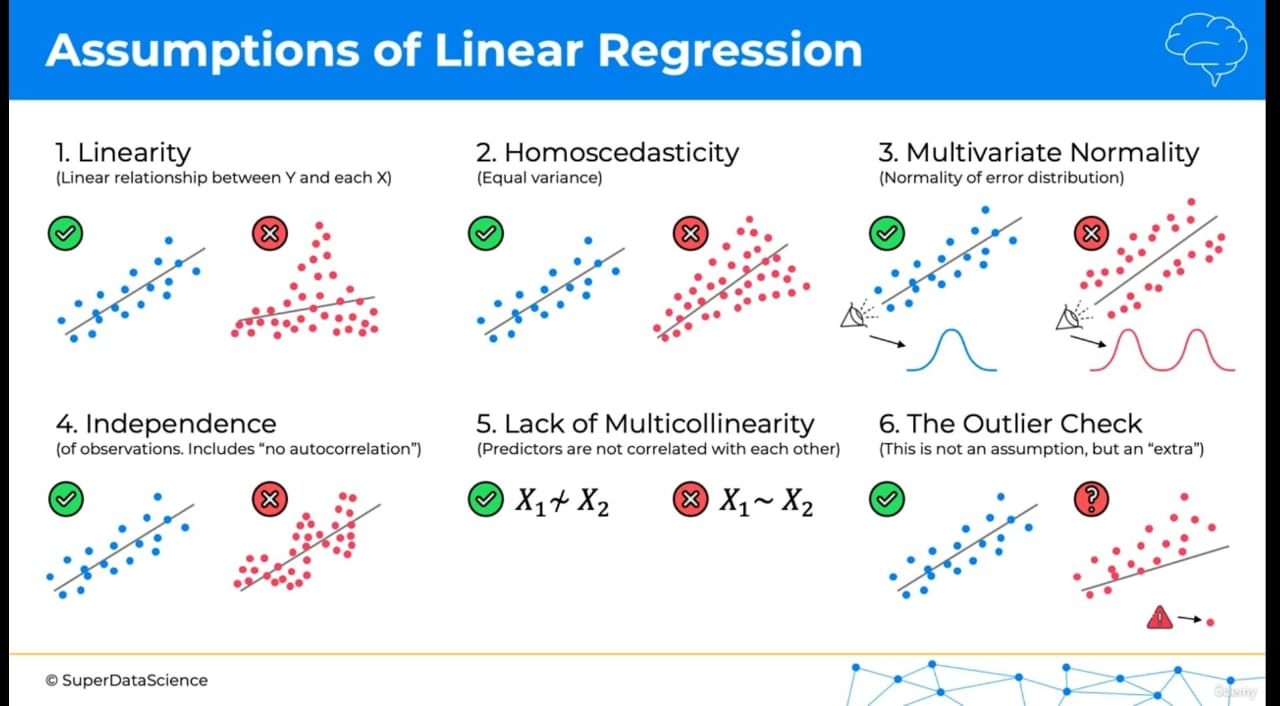

---
-------


# Dummy Variables

*   Always omit one dummy variable



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
X= data.iloc[:,:-1]
state = data.iloc[:,3:4]

print(state)

         State
0     New York
1   California
2      Florida
3     New York
4      Florida
5     New York
6   California
7      Florida
8     New York
9   California
10     Florida
11  California
12     Florida
13  California
14     Florida
15    New York
16  California
17    New York
18     Florida
19    New York
20  California
21    New York
22     Florida
23     Florida
24    New York
25  California
26     Florida
27    New York
28     Florida
29    New York
30     Florida
31    New York
32  California
33     Florida
34  California
35    New York
36     Florida
37  California
38    New York
39  California
40  California
41     Florida
42  California
43    New York
44  California
45    New York
46     Florida
47  California
48    New York
49  California


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(('encoder',OneHotEncoder(),[0]),remainder='passthrough')
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
state = np.array(ct.fit_transform(state))
print(state)

[[1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]]


# Understanding the P-value


H0 - Fair coin
H1 - Unfair Coin

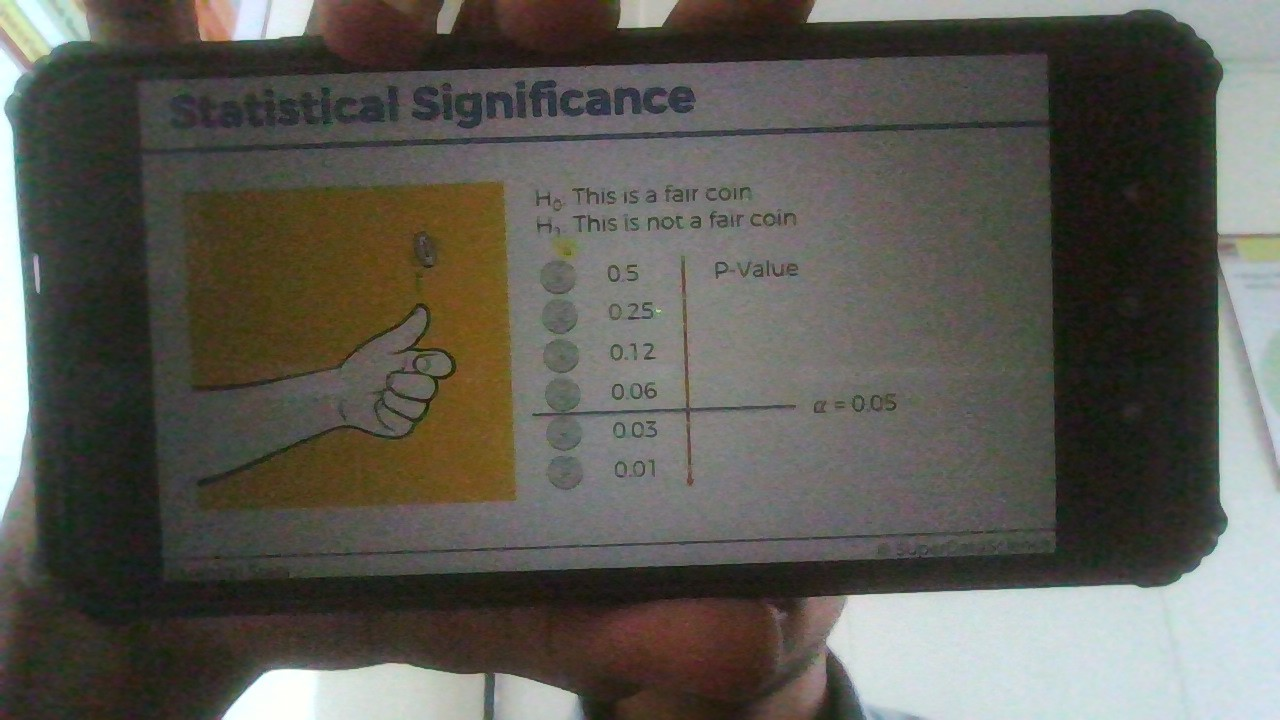

# **Buildig a Model**

## 5methods to building models
- 1.ALl-in
- Backward Elimination   -|
- Forward Selection        -| Stepwise Regression
- Bidirectional Elimination -|
- Score Comparison

## Backward Elimination

- STEP1 : Select Significance level to stay in the model SL=0.05
- STEP2 : Fit the full model woth all possible predictors
- STEP3 : Consider the predictor with highest P-value **if p = SL go to STEP4**
- STEP4 : REmove predictor
- STEP5  : Fit the model without this variable*

Fin the model - model is ready

## Forward selection

- Step1 : Select a significamce level to enter th model SL = 0.5
- Step2 : Fill all sample regression models y-xn Select one with lowest P-value
- Step3 : Keep this variable and fit all possible models with one extra preditor added to one you already have
- Step4 : Consider the predictor with lowest P if P< SL go STEP3 else FIN

## Bidirectional Elimination

SLENTER  =0.05,SLSTAY = 0.05
2 : Forward Selection
3 : Backward Selection
4: If no new variables can enter and no old variables can exit then FIN

---

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

IN MULTIPLE LINEAR REGRESSION THERE IS NO NEED FOR FEATURE SCALLING

DO we have to take action or check dummy variables?
ANS : **NO**, model will simply take responsibllit of this as now it is goin in advancement

Q2 Do we have to check the best feature and having greater P value to